In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split
# Import Keras Tuner (à installer si besoin: pip install keras-tuner)
import keras_tuner as kt

In [4]:
# Chargement du dataset CIFAR-10
# cifar10.load_data() renvoie les images et labels pour l'entraînement et le test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Après cette ligne:
# - x_train: tableau de shape (50000, 32, 32, 3) contenant les images d'entraînement
# - y_train: labels entiers (0-9) correspondants
# - x_test / y_test: jeu de test séparé (10000 images)


c:\Users\Hoa\Documents\MD\MD4\Deep Learning\CNN-training\env\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


In [5]:
# Normalisation des pixels: convertir de [0,255] à [0.0,1.0]
# Cela aide le modèle à converger plus rapidement et stabilise l'entraînement.
x_train = x_train / 255.0
x_test = x_test / 255.0
# Après cela, chaque valeur de pixel est un float entre 0 et 1.


In [4]:
# Création du modèle CNN amélioré avec plus de couches
# Sequential = empiler les couches dans l'ordre
# Input(shape=...) est la première couche pour déclarer explicitement la forme des entrées

model = Sequential([
    # Déclaration explicite de la forme d'entrée (32x32x3)
    Input(shape=(32, 32, 3)),
    
    # 1ère couche convolutionnelle: 32 filtres 3x3
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # 2ème couche convolutionnelle: 64 filtres 3x3
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # 3ème couche convolutionnelle: 128 filtres 3x3
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # 4ème couche convolutionnelle: 256 filtres 3x3 pour capturer plus de patterns complexes
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # Flatten transforme les feature maps 2D en vecteur 1D pour les couches denses
    Flatten(),
    
    # Couche entièrement connectée (dense) avec 128 neurones et ReLU
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.5),  # Désactive aléatoirement 50% des neurones pour éviter l'overfitting
    
    # Couche de sortie: 10 neurones (une par classe) avec softmax pour probabilités
    Dense(10, activation='softmax')
])

# Compilation du modèle: configuration de l'entraînement
# optimizer='adam': algorithme d'optimisation adaptatif, bon choix par défaut
# loss='sparse_categorical_crossentropy': adaptée aux labels entiers (0..9)
# metrics=['accuracy']: on surveille l'exactitude pendant l'entraînement
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Callbacks: checkpoint, early stopping, reduce LR


checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Re-train (plus d'epochs; arrêt précoce contrôlera la durée)
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint, earlystop, reduce_lr]
)

Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3940 - loss: 1.9124

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.4902 - loss: 1.5441 - val_accuracy: 0.5807 - val_loss: 1.2328 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6703 - loss: 1.0135 - val_accuracy: 0.5653 - val_loss: 1.3515 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7370 - loss: 0.8471 - val_accuracy: 0.5541 - val_loss: 1.4833 - learning_rate: 0.0010
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7863 - loss: 0.7188

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.7825 - loss: 0.7348 - val_accuracy: 0.7024 - val_loss: 1.0018 - learning_rate: 0.0010
Epoch 5/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8239 - loss: 0.6280

782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.8141 - loss: 0.6598 - val_accuracy: 0.7432 - val_loss: 0.9018 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8554 - loss: 0.5605

782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.8424 - loss: 0.5979 - val_accuracy: 0.7584 - val_loss: 0.8591 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.8630 - loss: 0.5519 - val_accuracy: 0.7573 - val_loss: 0.9118 - learning_rate: 0.0010
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.8885 - loss: 0.5028 - val_accuracy: 0.7173 - val_loss: 1.1902 - learning_rate: 0.0010
Epoch 9/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.9007 - loss: 0.4764 - val_accuracy: 0.7504 - val_loss: 1.0754 - learning_rate: 0.0010
Epoch 10/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.9549 - loss: 0.3405 - val_accuracy: 0.8017 - val_loss: 0.9484 - learning_rate: 5.0000e-04
Epoch 11/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 146ms/step - accuracy: 0.9730 - loss: 0.2793 - val_accuracy: 0.7654 - val_loss: 1.1439 - learning_rate: 5.0000e-04


In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 6s - 18ms/step - accuracy: 0.7584 - loss: 0.8591
Test accuracy: 0.758400022983551


In [7]:
# Split train/validation (ne pas utiliser le test pour la validation)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
print('Shapes:', x_train.shape, x_val.shape, x_test.shape)

Shapes: (45000, 32, 32, 3) (5000, 32, 32, 3) (10000, 32, 32, 3)


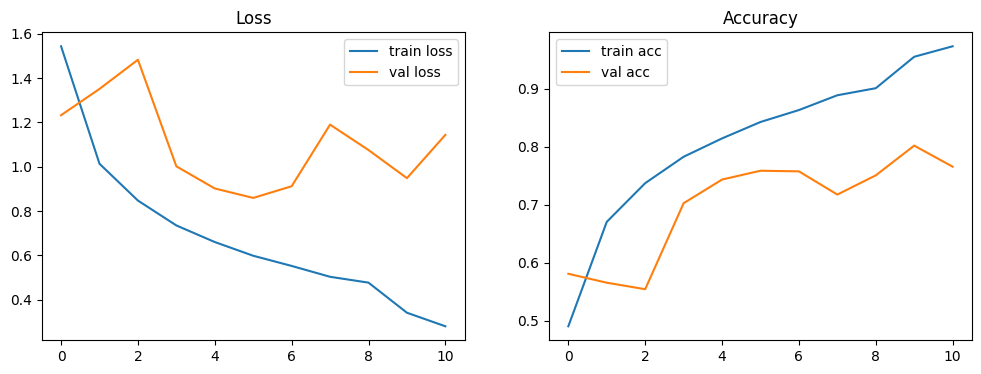

In [8]:
# Tracer courbes d'entraînement
import matplotlib.pyplot as plt

def plot_history(h):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(h.history['loss'], label='train loss')
    plt.plot(h.history['val_loss'], label='val loss')
    plt.legend(); plt.title('Loss')

    plt.subplot(1,2,2)
    plt.plot(h.history['accuracy'], label='train acc')
    plt.plot(h.history['val_accuracy'], label='val acc')
    plt.legend(); plt.title('Accuracy')
    plt.show()

plot_history(history)

In [9]:
# Charger le meilleur modèle sauvegardé et évaluer sur le test
from tensorflow.keras.models import load_model
best = load_model('best_model.h5')
test_loss, test_acc = best.evaluate(x_test, y_test, verbose=2)
print(f'Best model test accuracy: {test_acc}')



313/313 - 7s - 22ms/step - accuracy: 0.7584 - loss: 0.8591
Best model test accuracy: 0.758400022983551


## Keras Tuner (Grid Search)

In [11]:
# Fonction qui construit un modèle Keras selon les hyperparamètres proposés
# Adapté à l'architecture améliorée avec 4 couches convolutionnelles
from tensorflow.keras import Input

def model_builder(hp):
    # Tuner les nombres de filtres pour chaque couche (progression croissante)
    f1 = hp.Int('filters_1', min_value=16, max_value=128, step=16, default=32)
    f2 = hp.Int('filters_2', min_value=16, max_value=128, step=16, default=64)
    f3 = hp.Int('filters_3', min_value=16, max_value=192, step=16, default=128)
    f4 = hp.Int('filters_4', min_value=16, max_value=256, step=16, default=256)
    
    # Tuner le taux de dropout et les hyperparamètres des couches denses
    dropout_rate = hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1, default=0.5)
    dense_units = hp.Int('dense_units', min_value=64, max_value=256, step=32, default=128)
    
    # Tuner la taille du noyau pour les convolutions (3 ou 5)
    kernel_size = hp.Choice('kernel_size', values=[3, 5], default=3)


    model_t = tf.keras.Sequential([
        Input(shape=(32, 32, 3)),
        
        # 1ère couche convolutionnelle
        tf.keras.layers.Conv2D(f1, (kernel_size, kernel_size), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        # 2ème couche convolutionnelle
        tf.keras.layers.Conv2D(f2, (kernel_size, kernel_size), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        # 3ème couche convolutionnelle
        tf.keras.layers.Conv2D(f3, (kernel_size, kernel_size), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        # 4ème couche convolutionnelle
        tf.keras.layers.Conv2D(f4, (kernel_size, kernel_size), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        # Couches denses
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(dense_units, activation='relu', kernel_regularizer=l2(1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model_t.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    return model_t

# Configurer le tuner (Hyperband - efficace pour exploration rapide)
# réduire max_epochs si tu veux une recherche plus courte
tuner = kt.Hyperband(
    model_builder,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='kt_dir',
    project_name='cifar10_4conv_layers'
)

# Callback pour arrêter tôt les essais qui sur-ajustent
tuner_early = EarlyStopping(monitor='val_loss', patience=3)

# Lancer la recherche (exécution courte — adapte epochs/trials si tu as du temps)
# Attention: ceci peut prendre du temps selon ton hardware.
print('Démarrage de la recherche Keras Tuner avec 4 couches conv — ceci peut être long...')
tuner.search(x_train, y_train, epochs=8, validation_data=(x_val, y_val), callbacks=[tuner_early])

# Récupérer les meilleurs hyperparamètres
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print('\nMeilleurs hyperparamètres trouvés:')
print('filters_1 =', best_hps.get('filters_1'))
print('filters_2 =', best_hps.get('filters_2'))
print('filters_3 =', best_hps.get('filters_3'))
print('filters_4 =', best_hps.get('filters_4'))
print('kernel_size =', best_hps.get('kernel_size'))
print('dense_units =', best_hps.get('dense_units'))
print('dropout_rate =', best_hps.get('dropout_rate'))

# Construire le meilleur modèle et l'entraîner plus longtemps si souhaité
best_model = tuner.hypermodel.build(best_hps)
print('\nEntraînement du meilleur modèle trouvé...')
best_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[checkpoint, earlystop, reduce_lr])

Reloading Tuner from kt_dir\cifar10_4conv_layers\tuner0.json
Démarrage de la recherche Keras Tuner avec 4 couches conv — ceci peut être long...

Meilleurs hyperparamètres trouvés:
filters_1 = 32
filters_2 = 48
filters_3 = 128
filters_4 = 80
kernel_size = 3
dense_units = 160
dropout_rate = 0.6000000000000001


KeyboardInterrupt: 